# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to either make a video or submit a writeup explaining the main part of the code. For video, upload it to youtube or any other video sharing service and provide the link in the form given below. For Text writeup, you can create a blog or write it in a doc file and submit.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
2. Video/Writeup for Feature 1: 15 marks
3. Feature 2: 35 marks
4. Video/Writeup for Feature 2: 15 marks

In [1]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load faceBlendCommon file to use common functions.

In [2]:
import sys
sys.path.append('../resource/lib/public')
import faceBlendCommon as fbc

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [4]:
# Landmark model location
PREDICTOR_PATH =  "../resource/lib/publicdata/models/shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

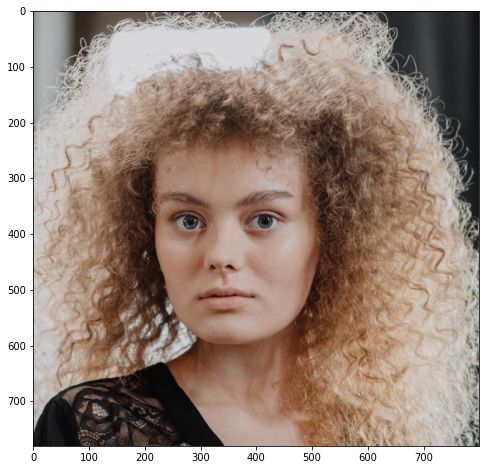

In [5]:
im = cv2.imread("../resource/lib/publicdata/images/girl-no-makeup.jpg")

imDlib = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(imDlib)

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [6]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)
print(points)

[(216, 375), (217, 411), (224, 446), (233, 480), (242, 515), (258, 547), (283, 574), (313, 594), (350, 600), (390, 595), (430, 579), (464, 557), (488, 524), (501, 487), (508, 447), (513, 408), (514, 369), (223, 343), (241, 326), (268, 325), (293, 333), (317, 346), (362, 345), (389, 331), (418, 321), (449, 321), (474, 336), (338, 374), (337, 397), (335, 419), (333, 442), (315, 465), (326, 468), (337, 471), (351, 468), (364, 465), (252, 378), (268, 368), (289, 369), (307, 385), (287, 390), (266, 389), (382, 384), (401, 369), (423, 367), (441, 375), (426, 387), (404, 389), (293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (377, 528), (356, 535), (341, 536), (326, 535), (310, 530), (303, 516), (327, 512), (340, 512), (354, 511), (391, 513), (354, 512), (341, 513), (327, 513)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

# Feature 1: Apply Lipstick

# 1. Identify coordinates

## 1.1 Show all points

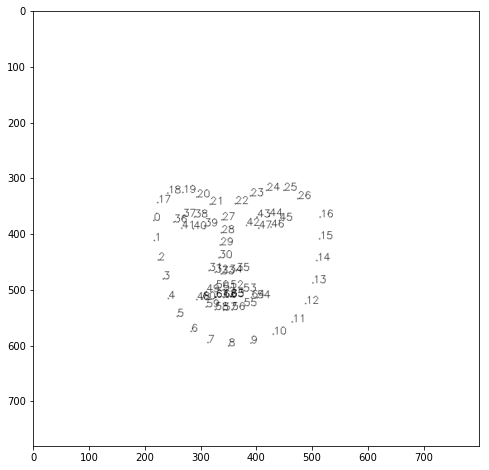

In [99]:
allwhite = np.ones_like(imDlib) * 255


for i, point in enumerate(points):
    cv2.circle(allwhite, (point[0], point[1]), 1, (0, 0, 0))
    cv2.putText(allwhite, str(i), (point[0], point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)
    
#len(croppoints)
plt.imshow(allwhite)

## 1.2 Identify Lip index points

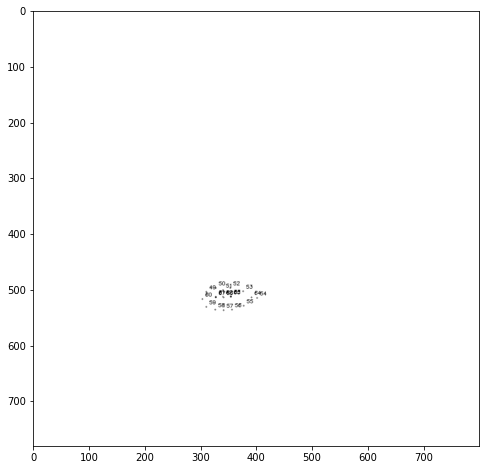

In [100]:
mouthonly = np.ones_like(imDlib) * 255


for i, point in enumerate(points):
    if i > 48:
        cv2.circle(mouthonly, (point[0], point[1]), 1, (0, 0, 0))
        cv2.putText(mouthonly, str(i), (point[0]+5, point[1]-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), 1)

plt.imshow(mouthonly)

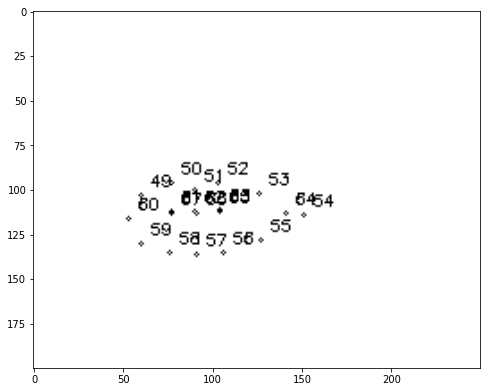

In [101]:
plt.imshow(mouthonly[400:600, 250:500])

## 1.3 Segment the lip in sub-parts

Manually divide the lip in fewer points in order to keep the shape with hull.
This is especially relevant when using a picture where one has the mouth more open

In [10]:

lower_lip_r = [54, 55, 56, 57, 65]

lower_lip_m = [56, 57, 58, 66]

lower_lip_m2 = [56, 65, 66]

lower_lip_m3 = [66, 58, 67]

lower_lip_l = [48, 59, 58, 67]

#upper_lip_r = [64, 53, 52, 51, 63]

upper_lip_r = [54, 53, 52, 51, 63]

upper_lip_m = [51, 61, 62, 63]

#upper_lip_l = [60, 49, 50, 51, 61]

upper_lip_l = [48, 49, 50, 51, 61]

lip = ([lower_lip_r, lower_lip_m, lower_lip_m2, lower_lip_m3, lower_lip_l, upper_lip_r, upper_lip_m, upper_lip_l])

## 2. Find Lip ROI

In [11]:
# find roi position by searching for min or max of points

def lipstick_mask_roi(dlib_index_list, all_dlib_points, mask_to_attach_to):
    #print(type(mask_to_attach_to))
    lip_points = []
    xmax = 0
    ymax = 0
    xmin = 5000
    ymin = 5000
    
    # return the highest and the lowest value     
    for i, point in enumerate(all_dlib_points):
        if i in dlib_index_list:
            #print("debug: point",point)
            x, y = point
            if x > xmax:
                xmax = x
            if x < xmin:
                xmin = x            
            if y > ymax:
                ymax = y
            if y < ymin:
                ymin = y
            lip_points.append(point)       
            
    hullIndex = cv2.convexHull(np.array(lip_points), returnPoints=False)
    
    hullInt = []
    
    # 
    for hIndex in hullIndex:
        hullInt.append(lip_points[hIndex[0]])
        
    cv2.fillConvexPoly(mask_to_attach_to, np.int32(hullInt), (255, 255, 255))
    #print(xmax, ymax, xmin, ymin)
    return lip_points, xmax, ymax, xmin, ymin

## 3. Create lip mask

In [12]:
# create black mask
mask = np.zeros_like(imDlib)

lip_points_total = []
xmax_total = 0
ymax_total = 0
xmin_total = 1000
ymin_total = 1000


# add points in white
for e in lip:
    lip_points, xmax, ymax, xmin, ymin = lipstick_mask_roi(e, points, mask)
    lip_points_total.append(lip_points)
    if xmax > xmax_total:
        xmax_total = xmax
    if ymax > ymax_total:
        ymax_total = ymax
    if xmin < xmin_total:
        xmin_total = xmin
    if ymin < ymin_total:
        ymin_total = ymin
        
#print(xmax_total, ymax_total, xmin_total, ymin_total)

## 4. Cut out ROI + ROI_mask

In [13]:
lip_roi = imDlib[int(ymin_total-10):int(ymax_total+10), int(xmin_total-10) : int(xmax_total+10)]
lip_roi_mask = mask[int(ymin_total-10):int(ymax_total+10), int(xmin_total-10) : int(xmax_total+10)]

lip_inv_mask = np.invert(lip_roi_mask)

## 5. Define the colors

In [ ]:
green = [0, 255, 0]
blue = [0, 0, 255]
red = [255, 0, 0]
pink = [230, 95, 217]
mordantred = [179, 0, 0]
crimsonred = [153, 0, 0] 
palepink = [219, 169, 194]

## 6. Change the color to the wanted one in the inverted mask

### 6.1 Dilate the inverted mask

### 6.2 Change the color

### 6.3 Gaussian Blur

### 6.4 Perform mixed seamless cloning

In [14]:
# CreateColoredLips
def createColoredLips(roi_im, inv_mask, color, kernel1=33, kernel2=3, kernel_dil=3, iterations=1):
    #start with dilate
    inv_mask_dil = cv2.dilate(inv_mask, (kernel_dil, kernel_dil), iterations=iterations);
    # change the color
    blacktocol2 = np.where(inv_mask_dil == [0, 0, 0], color, inv_mask_dil);
    # blur it to unsharpen the edges
    blacktocol_blur2 = cv2.GaussianBlur(np.uint8(blacktocol2),(kernel1, kernel2),0,0)
    # seamless clone
    obj = np.uint8(blacktocol_blur2)    
    center = (int(roi_im.shape[1]//2), int(roi_im.shape[0]//2))    
    mask = 255 * np.ones_like(obj)
    roi_colored = cv2.seamlessClone(obj, roi_im, mask, center, cv2.MIXED_CLONE)
    return roi_colored

In [15]:
# reinserts the ROI into the main picture
def reinsertROI(roiinname, imDlib, ymin_total=ymin_total, ymax_total=ymax_total, \
                xmin_total=xmin_total, xmax_total=xmax_total, roiextention=10):    
    outname = imDlib.copy()    
    outname[int(ymin_total-roiextention):int(ymax_total+roiextention), int(xmin_total-roiextention) :\
            int(xmax_total+roiextention)] = roiinname
    return outname


## 6. Reinsert ROI

In [17]:
palepink = createColoredLips(lip_roi, lip_inv_mask, palepink)
im_palepink = reinsertROI(palepink, imDlib)

crimsonred = createColoredLips(lip_roi, lip_inv_mask, crimsonred)
im_crimsonred = reinsertROI(crimsonred, imDlib)

pink = createColoredLips(lip_roi, lip_inv_mask, pink)
im_pink = reinsertROI(pink, imDlib)

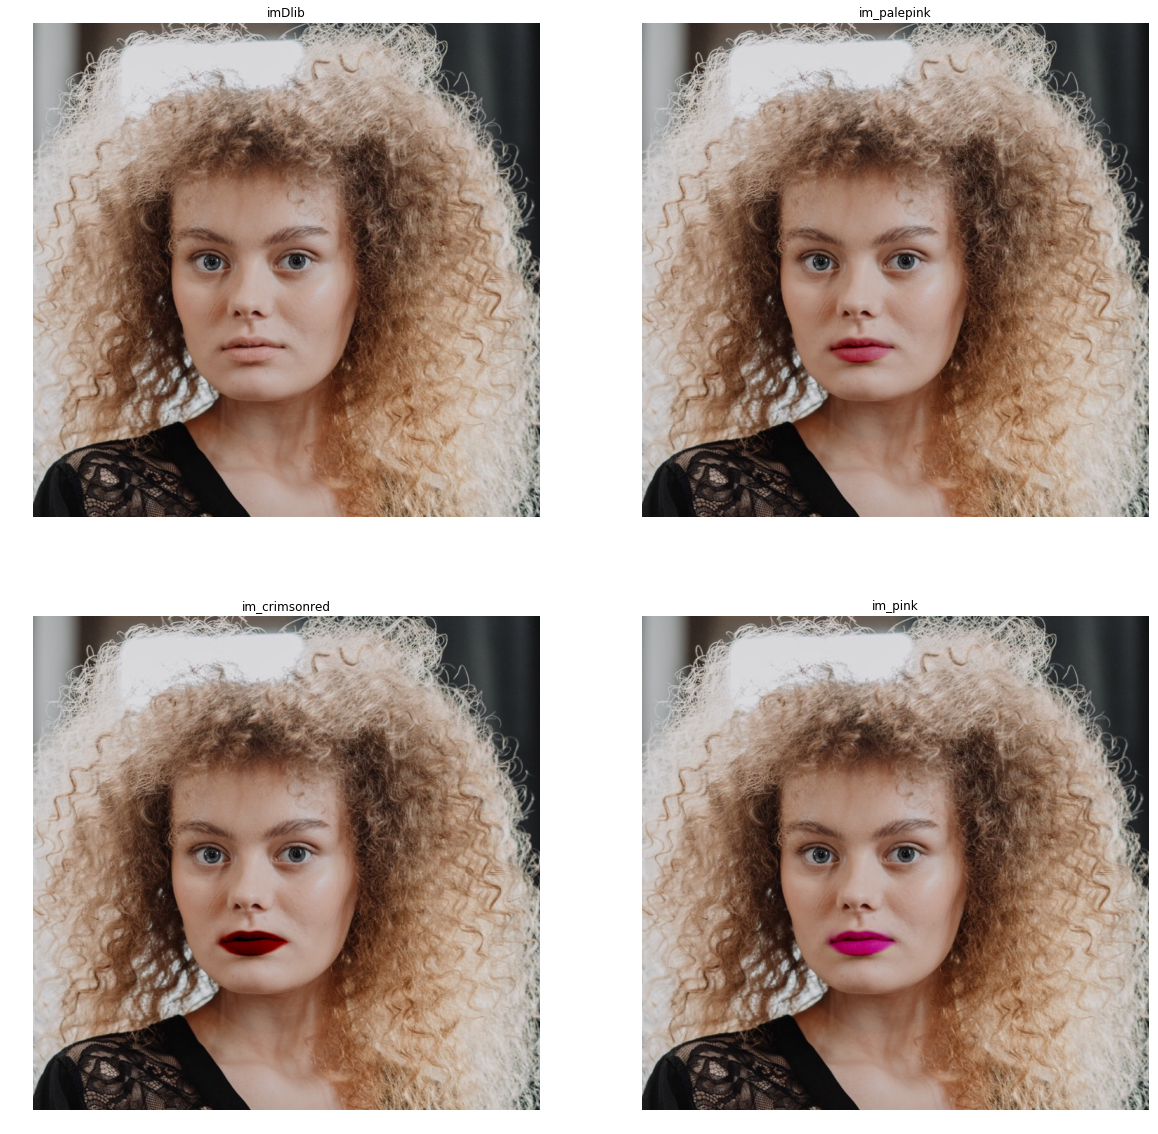

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title("imDlib")
plt.imshow(imDlib)
ax = plt.axis('off')
plt.subplot(222)
plt.title("im_palepink")
plt.imshow(im_palepink)
ax = plt.axis('off')
plt.subplot(223)
plt.title("im_crimsonred")
plt.imshow(im_crimsonred)
ax = plt.axis('off')
plt.subplot(224)
plt.title("im_pink")
plt.imshow(im_pink)
ax = plt.axis('off')

# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

# Feature 2: Apply Eyecolor (Lens Color)

# 1. Identify coordinates

## 1.1 Show all points

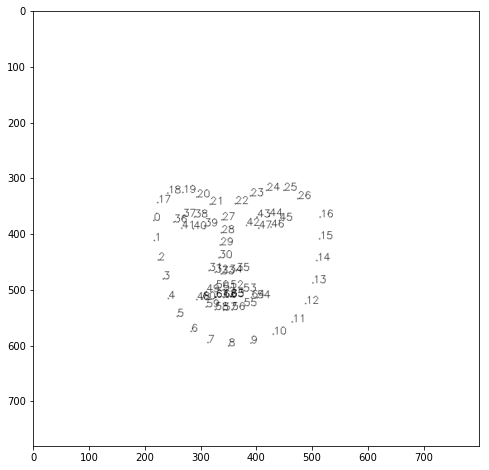

In [59]:
showpoints = np.ones_like(imDlib) * 255


for i, point in enumerate(points):
    cv2.circle(showpoints, (point[0], point[1]), 1, (0, 0, 0))
    cv2.putText(showpoints, str(i), (point[0], point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

plt.imshow(showpoints)

## 1.11 Find points for the eyes

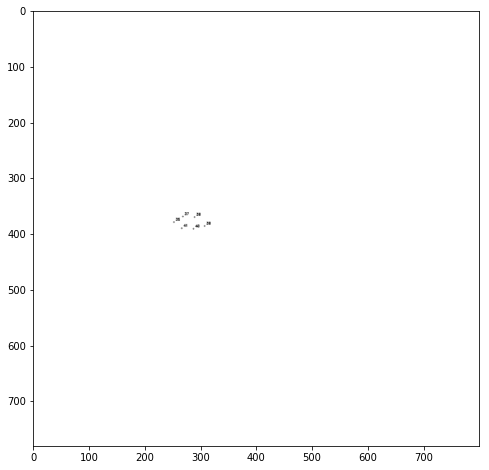

In [60]:
righteye = np.ones_like(imDlib) * 255


for i, point in enumerate(points):
    if (i > 35) & (i < 42):
        cv2.circle(righteye, (point[0], point[1]), 1, (0, 0, 0))
        cv2.putText(righteye, str(i), (point[0]+3, point[1]-3), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0, 0, 0))

plt.imshow(righteye)

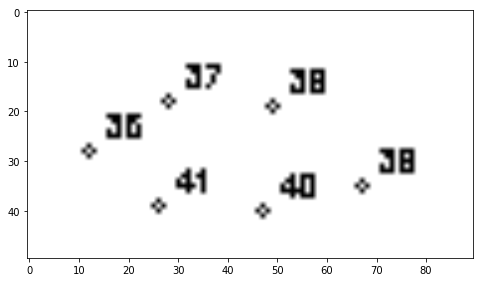

In [61]:
plt.imshow(righteye[350:400, 240:330])

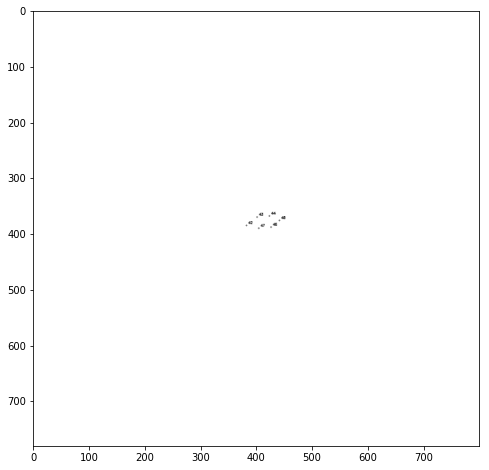

In [62]:
lefteye = np.ones_like(imDlib) * 255


for i, point in enumerate(points):
    if (i > 41) & (i < 48):
        cv2.circle(lefteye, (point[0], point[1]), 1, (0, 0, 0))
        cv2.putText(lefteye, str(i), (point[0]+3, point[1]-3), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0, 0, 0))

plt.imshow(lefteye)

## 2. Define coordinates for right and left eye from the indexes

In [63]:
righteye = [[36, 37, 38, 39, 40, 41]]
lefteye = [[42, 43, 44, 45, 46, 47]]

## 2.1 Find corner coordinates for the ROI for right and left eye

In [64]:
# find roi position by searching for min or max of coordinates

def mask_roi(dlib_index_list, all_dlib_points, mask_to_attach_to):
    #print(type(mask_to_attach_to))
    lip_points = []
    xmax = 0
    ymax = 0
    xmin = 5000
    ymin = 5000
    
    for i, point in enumerate(all_dlib_points):
        if i in dlib_index_list:
            #print("debug: point",point)
            x, y = point
            if x > xmax:
                xmax = x
            if x < xmin:
                xmin = x            
            if y > ymax:
                ymax = y
            if y < ymin:
                ymin = y
            lip_points.append(point)       
            
    hullIndex = cv2.convexHull(np.array(lip_points), returnPoints=False)
    
    hullInt = []
    
    for hIndex in hullIndex:
        hullInt.append(lip_points[hIndex[0]])
        
    cv2.fillConvexPoly(mask_to_attach_to, np.int32(hullInt), (255, 255, 255))
    #print(xmax, ymax, xmin, ymin)
    return lip_points, xmax, ymax, xmin, ymin

In [65]:
# create black mask
mask_l = np.zeros_like(imDlib)


lefteye_points_total = []
xmax_total_l = 0
ymax_total_l = 0
xmin_total_l = 1000
ymin_total_l = 1000


# add points in white
for e in lefteye:
    lefteye_points, xmax_l, ymax_l, xmin_l, ymin_l = lipstick_mask_roi(e, points, mask_l)
    lefteye_points_total.append(lefteye_points)
    if xmax_l > xmax_total_l:
        xmax_total_l = xmax_l
    if ymax_l > ymax_total_l:
        ymax_total_l = ymax_l
    if xmin_l < xmin_total_l:
        xmin_total_l = xmin_l
    if ymin_l < ymin_total_l:
        ymin_total_l = ymin_l

In [66]:
# create black mask
mask_r = np.zeros_like(imDlib)


righteye_points_total = []
xmax_total_r = 0
ymax_total_r = 0
xmin_total_r = 1000
ymin_total_r = 1000


# add points in white
for e in righteye:
    righteye_points, xmax_r, ymax_r, xmin_r, ymin_r = lipstick_mask_roi(e, points, mask_r)
    righteye_points_total.append(righteye_points)
    if xmax_r > xmax_total_r:
        xmax_total_r = xmax_r
    if ymax_r > ymax_total_r:
        ymax_total_r = ymax_r
    if xmin_r < xmin_total_r:
        xmin_total_r = xmin_r
    if ymin_r < ymin_total_r:
        ymin_total_r = ymin_r

In [67]:
lefteye_roi = imDlib[int(ymin_total_l-10):int(ymax_total_l+10), int(xmin_total_l-10) : int(xmax_total_l+10)]
righteye_roi = imDlib[int(ymin_total_r-10):int(ymax_total_r+10), int(xmin_total_r-10) : int(xmax_total_r+10)]

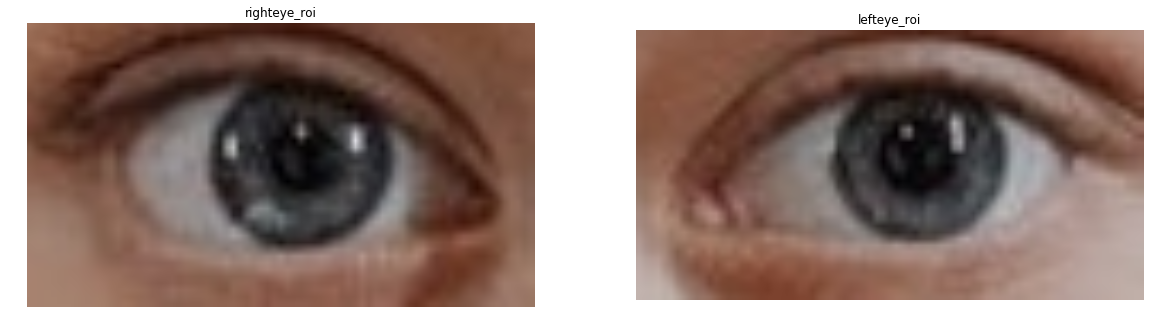

In [68]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("righteye_roi")
plt.imshow(righteye_roi)
ax = plt.axis('off')
plt.subplot(122)
plt.title("lefteye_roi")
plt.imshow(lefteye_roi)
ax = plt.axis('off')

## 3. Find the center of the eyes with houghcircles

In [69]:
righteye_roi_gray = cv2.cvtColor(righteye_roi, cv2.COLOR_BGR2GRAY)

lefteye_roi_gray = cv2.cvtColor(lefteye_roi, cv2.COLOR_BGR2GRAY)

img_blur_reye = cv2.medianBlur(righteye_roi_gray, 5)

img_blur_leye = cv2.medianBlur(lefteye_roi_gray, 5)

In [70]:
innercircle_r = cv2.HoughCircles(img_blur_reye, cv2.HOUGH_GRADIENT, 1, 10, param1=50, param2=20, minRadius=3, maxRadius=15)

outercircle_r = cv2.HoughCircles(img_blur_reye, cv2.HOUGH_GRADIENT, 1, 10, param1=50, param2=20, minRadius=10, maxRadius=20)

innercircle_l = cv2.HoughCircles(img_blur_leye, cv2.HOUGH_GRADIENT, 1, 10, param1=50, param2=20, minRadius=7, maxRadius=12)

outercircle_l = cv2.HoughCircles(img_blur_leye, cv2.HOUGH_GRADIENT, 1, 10, param1=50, param2=20, minRadius=10, maxRadius=20)


In [71]:
outercircle_r, innercircle_r, outercircle_l, innercircle_l

(array([[[39.5, 19.5, 13.8]]], dtype=float32),
 array([[[39.5, 19.5,  6. ]]], dtype=float32),
 array([[[43.5, 18.5, 13.6]]], dtype=float32),
 None)

Inner circle of left eye is not findable with Houghcircles (Result None), probably due to the light which is reflected
in the eye

In [72]:
righteye_roi_hc = righteye_roi.copy()
lefteye_roi_hc = lefteye_roi.copy()

if outercircle_r is not None:
    circlesr = np.uint16(np.around(outercircle_r))
    for i in circlesr[0, :]:
        # Draw outer circle
        cv2.circle(righteye_roi_hc, (i[0], i[1]), i[2], (0, 255, 0), 1)
        # Draw inner circle
        cv2.circle(righteye_roi_hc, (i[0], i[1]), int(innercircle_r[0][0][2]), (0, 0, 255), 1)

if outercircle_l is not None:
    circlesl = np.uint16(np.around(outercircle_l))
    for i in circlesl[0, :]:
        # Draw outer circle
        cv2.circle(lefteye_roi_hc, (i[0], i[1]), i[2], (0, 255, 0), 1)
        # Draw inner circle
        cv2.circle(lefteye_roi_hc, (i[0], i[1]), 7, (0, 0, 255), 1)
        
        
        
#plt.imshow(righteye_roi_houghcircles11)

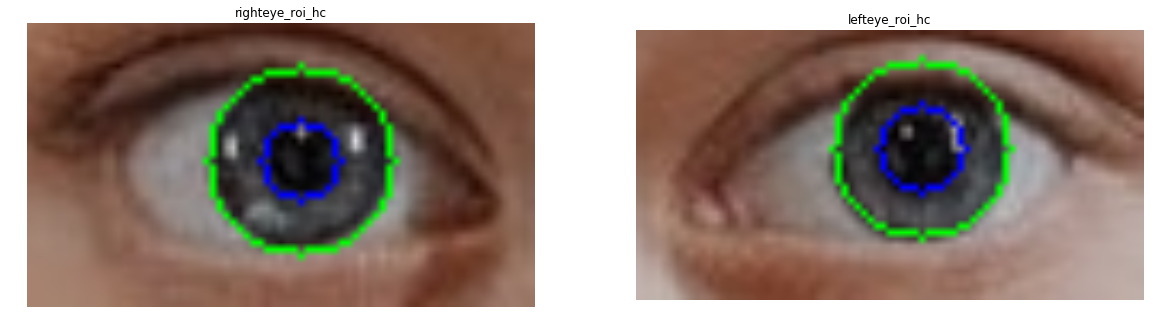

In [73]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("righteye_roi_hc")
plt.imshow(righteye_roi_hc)
ax = plt.axis('off')
plt.subplot(122)
plt.title("lefteye_roi_hc")
plt.imshow(lefteye_roi_hc)
ax = plt.axis('off')

## 3.1 Make the outer radius smaller

In [74]:
righteye_roi_hc_smaller = righteye_roi.copy()
lefteye_roi_hc_smaller = lefteye_roi.copy()



radius_new_l = int(13.6 * 0.8)
radius_new_r = int(13.8 * 0.75)

radius_inner_l = 6
radius_inner_r = int(innercircle_r[0][0][2])


if outercircle_r is not None:
    circlesr = np.uint16(np.around(outercircle_r))
    for i in circlesr[0, :]:
        # Draw outer circle
        cv2.circle(righteye_roi_hc_smaller, (i[0], i[1]), radius_new_r, (0, 255, 0), 1)
        # Draw inner circle
        cv2.circle(righteye_roi_hc_smaller, (i[0], i[1]), radius_inner_r , (0, 0, 255), 1)

if outercircle_l is not None:
    circlesl = np.uint16(np.around(outercircle_l))
    for i in circlesl[0, :]:
        # Draw outer circle
        cv2.circle(lefteye_roi_hc_smaller, (i[0], i[1]), radius_new_l, (0, 255, 0), 1)
        # Draw inner circle
        cv2.circle(lefteye_roi_hc_smaller, (i[0], i[1]), radius_inner_l, (0, 0, 255), 1)

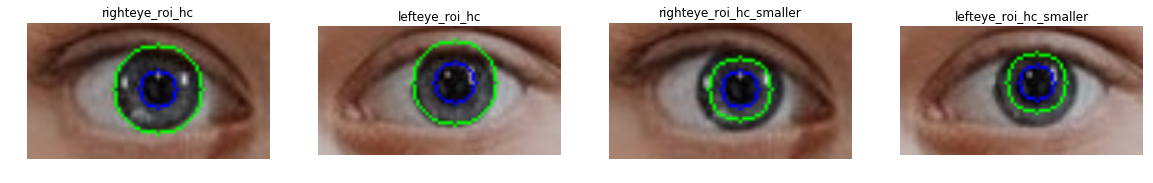

In [75]:
plt.figure(figsize=(20,20))
plt.subplot(141)
plt.title("righteye_roi_hc")
plt.imshow(righteye_roi_hc)
ax = plt.axis('off')
plt.subplot(142)
plt.title("lefteye_roi_hc")
plt.imshow(lefteye_roi_hc)
ax = plt.axis('off')
plt.subplot(143)
plt.title("righteye_roi_hc_smaller")
plt.imshow(righteye_roi_hc_smaller)
ax = plt.axis('off')
plt.subplot(144)
plt.title("lefteye_roi_hc_smaller")
plt.imshow(lefteye_roi_hc_smaller)
ax = plt.axis('off')

## 4. Create masks and invert them

In [76]:
roi_mask_right_eye = np.zeros_like(righteye_roi)
roi_mask_left_eye = np.zeros_like(lefteye_roi)
#plt.imshow(mask)

if outercircle_r is not None:
    circlesr = np.uint16(np.around(outercircle_r))
    for i in circlesr[0, :]:
        # Draw outer circle
        cv2.circle(roi_mask_right_eye, (i[0], i[1]), radius_new_r, (255, 255, 255), -1)
        # Draw inner circle and fill out
        cv2.circle(roi_mask_right_eye, (i[0], i[1]), radius_inner_r, (0, 0, 0), -1)
        
if outercircle_l is not None:
    circlesl = np.uint16(np.around(outercircle_l))
    for i in circlesl[0, :]:
        # Draw outer circle
        cv2.circle(roi_mask_left_eye, (i[0], i[1]), radius_new_l, (255, 255, 255), -1)
        # Draw inner circle
        cv2.circle(roi_mask_left_eye, (i[0], i[1]), radius_inner_l, (0, 0, 0), -1)
        
        
roi_mask_right_eye_inv = cv2.bitwise_not(roi_mask_right_eye)

roi_mask_left_eye_inv = cv2.bitwise_not(roi_mask_left_eye)


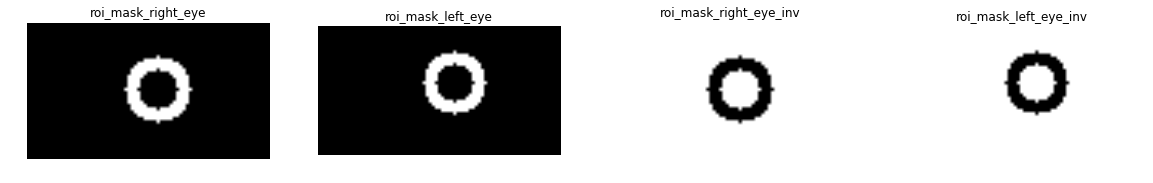

In [77]:
plt.figure(figsize=(20,20))
plt.subplot(141)
plt.title("roi_mask_right_eye")
plt.imshow(roi_mask_right_eye)
ax = plt.axis('off')
plt.subplot(142)
plt.title("roi_mask_left_eye")
plt.imshow(roi_mask_left_eye)
ax = plt.axis('off')
plt.subplot(143)
plt.title("roi_mask_right_eye_inv")
plt.imshow(roi_mask_right_eye_inv)
ax = plt.axis('off')
plt.subplot(144)
plt.title("roi_mask_left_eye_inv")
plt.imshow(roi_mask_left_eye_inv)
ax = plt.axis('off')

## 5. Define colors

In [78]:
blue = [0, 0, 255]
green = [0, 255, 0]
brown = [102, 51, 0]
blueish = [0, 51, 102]

## 5.1 Change Color in inverted mask as basis for seamless cloning

In [79]:
roi_mask_inv_blue_right = np.where((roi_mask_right_eye_inv == [0, 0, 0]), blue, roi_mask_right_eye_inv)

roi_mask_inv_green_right = np.where((roi_mask_right_eye_inv == [0, 0, 0]), green, roi_mask_right_eye_inv)

roi_mask_inv_brown_right = np.where((roi_mask_right_eye_inv == [0, 0, 0]), brown, roi_mask_right_eye_inv)

roi_mask_inv_blueish_right = np.where((roi_mask_right_eye_inv == [0, 0, 0]), blueish, roi_mask_right_eye_inv)

In [80]:
roi_mask_inv_blue_left = np.where((roi_mask_left_eye_inv == [0, 0, 0]), blue, roi_mask_left_eye_inv)

roi_mask_inv_green_left = np.where((roi_mask_left_eye_inv == [0, 0, 0]), green, roi_mask_left_eye_inv)

roi_mask_inv_brown_left = np.where((roi_mask_left_eye_inv == [0, 0, 0]), brown, roi_mask_left_eye_inv)

roi_mask_inv_blueish_left = np.where((roi_mask_left_eye_inv == [0, 0, 0]), blueish, roi_mask_left_eye_inv)

## 5.2 Blur the inverted mask

In [81]:
righteye_roi_clone = righteye_roi.copy()

roi_mask_inv_blue_right_blur = cv2.GaussianBlur(np.uint8(roi_mask_inv_blue_right),(31, 31),0,0)

roi_mask_inv_green_right_blur = cv2.GaussianBlur(np.uint8(roi_mask_inv_green_right),(47, 47),0,0)

roi_mask_inv_brown_right_blur = cv2.GaussianBlur(np.uint8(roi_mask_inv_brown_right),(31, 31),0,0)

roi_mask_inv_blueish_right_blur = cv2.GaussianBlur(np.uint8(roi_mask_inv_blueish_right),(31, 31),0,0)

In [82]:
lefteye_roi_clone = lefteye_roi.copy()

roi_mask_inv_blue_left_blur = cv2.GaussianBlur(np.uint8(roi_mask_inv_blue_left),(31, 31),0,0)

roi_mask_inv_green_left_blur = cv2.GaussianBlur(np.uint8(roi_mask_inv_green_left),(47, 47),0,0)

roi_mask_inv_brown_left_blur = cv2.GaussianBlur(np.uint8(roi_mask_inv_brown_left),(31, 31),0,0)

roi_mask_inv_blueish_left_blur = cv2.GaussianBlur(np.uint8(roi_mask_inv_blueish_left),(31, 31),0,0)

## 6. Perform seamless cloning

In [83]:
obj = np.uint8(roi_mask_inv_blue_right_blur)
center = (int(righteye_roi_clone.shape[1]//2), int(righteye_roi_clone.shape[0]//2))   
mask = 255 * np.ones_like(obj)

eye_right_colored_blue = cv2.seamlessClone(obj, righteye_roi_clone, mask, center, cv2.MIXED_CLONE)

In [84]:
obj = np.uint8(roi_mask_inv_green_right_blur)

eye_right_colored_green = cv2.seamlessClone(obj, righteye_roi_clone, mask, center, cv2.MIXED_CLONE)

In [85]:
obj = np.uint8(roi_mask_inv_brown_right_blur)

eye_right_colored_brown = cv2.seamlessClone(obj, righteye_roi_clone, mask, center, cv2.MIXED_CLONE)

In [86]:
obj = np.uint8(roi_mask_inv_blueish_right_blur)

eye_right_colored_blueish = cv2.seamlessClone(obj, righteye_roi_clone, mask, center, cv2.MIXED_CLONE)

In [87]:
obj = np.uint8(roi_mask_inv_blue_left_blur)
center = (int(lefteye_roi_clone.shape[1]//2), int(lefteye_roi_clone.shape[0]//2))   
mask = 255 * np.ones_like(obj)

eye_left_colored_blue = cv2.seamlessClone(obj, lefteye_roi_clone, mask, center, cv2.MIXED_CLONE)

In [88]:
obj = np.uint8(roi_mask_inv_green_left_blur)

eye_left_colored_green = cv2.seamlessClone(obj, lefteye_roi_clone, mask, center, cv2.MIXED_CLONE)

In [89]:
obj = np.uint8(roi_mask_inv_brown_left_blur)

eye_left_colored_brown = cv2.seamlessClone(obj, lefteye_roi_clone, mask, center, cv2.MIXED_CLONE)

In [90]:
obj = np.uint8(roi_mask_inv_blueish_left_blur)

eye_left_colored_blueish = cv2.seamlessClone(obj, lefteye_roi_clone, mask, center, cv2.MIXED_CLONE)

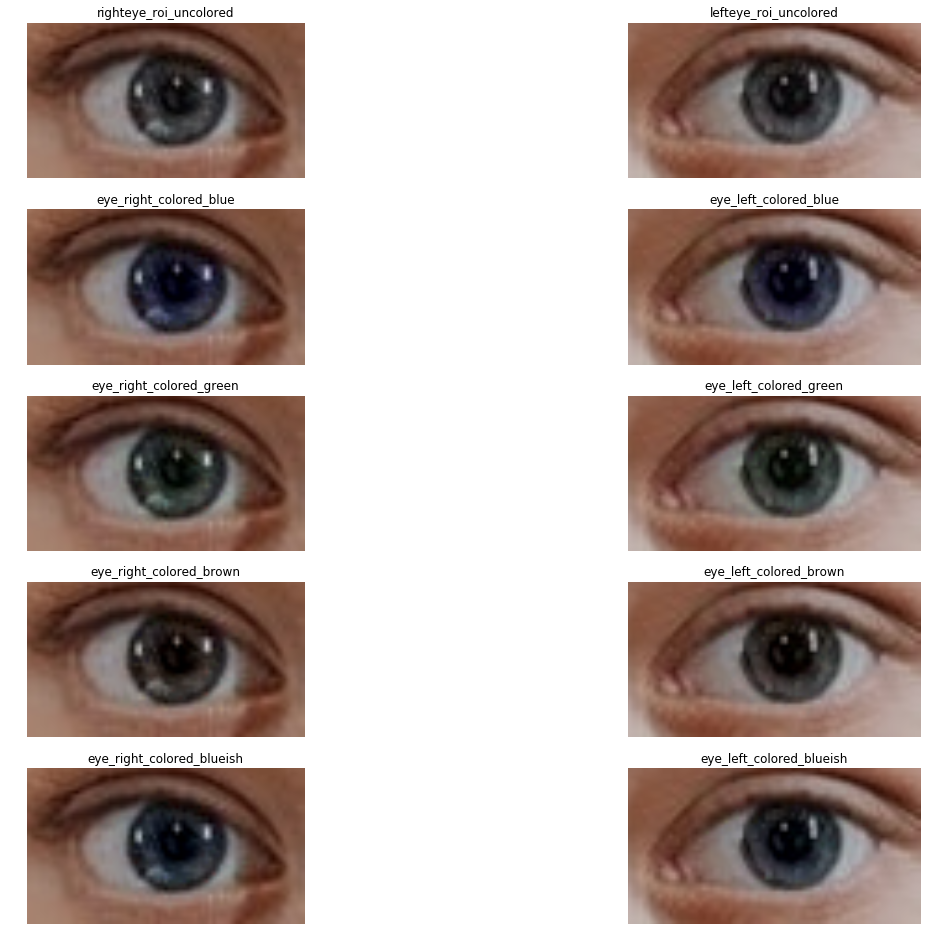

In [92]:
plt.figure(figsize=(20,20))
plt.subplot(621)
plt.title("righteye_roi_uncolored")
plt.imshow(righteye_roi)
ax = plt.axis('off')
plt.subplot(622)
plt.title("lefteye_roi_uncolored")
plt.imshow(lefteye_roi)
ax = plt.axis('off')
plt.subplot(623)
plt.title("eye_right_colored_blue")
plt.imshow(eye_right_colored_blue)
ax = plt.axis('off')
plt.subplot(624)
plt.title("eye_left_colored_blue")
plt.imshow(eye_left_colored_blue)
ax = plt.axis('off')
plt.subplot(625)
plt.title("eye_right_colored_green")
plt.imshow(eye_right_colored_green)
ax = plt.axis('off')
plt.subplot(626)
plt.title("eye_left_colored_green")
plt.imshow(eye_left_colored_green)
ax = plt.axis('off')
plt.subplot(627)
plt.title("eye_right_colored_brown")
plt.imshow(eye_right_colored_brown)
ax = plt.axis('off')
plt.subplot(628)
plt.title("eye_left_colored_brown")
plt.imshow(eye_left_colored_brown)
ax = plt.axis('off')
plt.subplot(629)
plt.title("eye_right_colored_blueish")
plt.imshow(eye_right_colored_blueish)
ax = plt.axis('off')
plt.subplot(6,2,10)
plt.title("eye_left_colored_blueish")
plt.imshow(eye_left_colored_blueish)
ax = plt.axis('off')

## 7. Put back changed roi into the basis picture

In [93]:
eyes_blue = imDlib.copy()

eyes_blue[int(ymin_total_l-10):int(ymax_total_l+10), \
          int(xmin_total_l-10) : int(xmax_total_l+10)] = eye_left_colored_blue
eyes_blue[int(ymin_total_r-10):int(ymax_total_r+10), \
          int(xmin_total_r-10) : int(xmax_total_r+10)] = eye_right_colored_blue

In [94]:
eyes_green = imDlib.copy()

eyes_green[int(ymin_total_l-10):int(ymax_total_l+10), \
          int(xmin_total_l-10) : int(xmax_total_l+10)] = eye_left_colored_green
eyes_green[int(ymin_total_r-10):int(ymax_total_r+10), \
          int(xmin_total_r-10) : int(xmax_total_r+10)] = eye_right_colored_green

In [95]:
eyes_brown = imDlib.copy()

eyes_brown[int(ymin_total_l-10):int(ymax_total_l+10), \
          int(xmin_total_l-10) : int(xmax_total_l+10)] = eye_left_colored_brown
eyes_brown[int(ymin_total_r-10):int(ymax_total_r+10), \
          int(xmin_total_r-10) : int(xmax_total_r+10)] = eye_right_colored_brown

In [96]:
eyes_blueish = imDlib.copy()

eyes_blueish[int(ymin_total_l-10):int(ymax_total_l+10), \
          int(xmin_total_l-10) : int(xmax_total_l+10)] = eye_left_colored_blueish
eyes_blueish[int(ymin_total_r-10):int(ymax_total_r+10), \
          int(xmin_total_r-10) : int(xmax_total_r+10)] = eye_right_colored_blueish

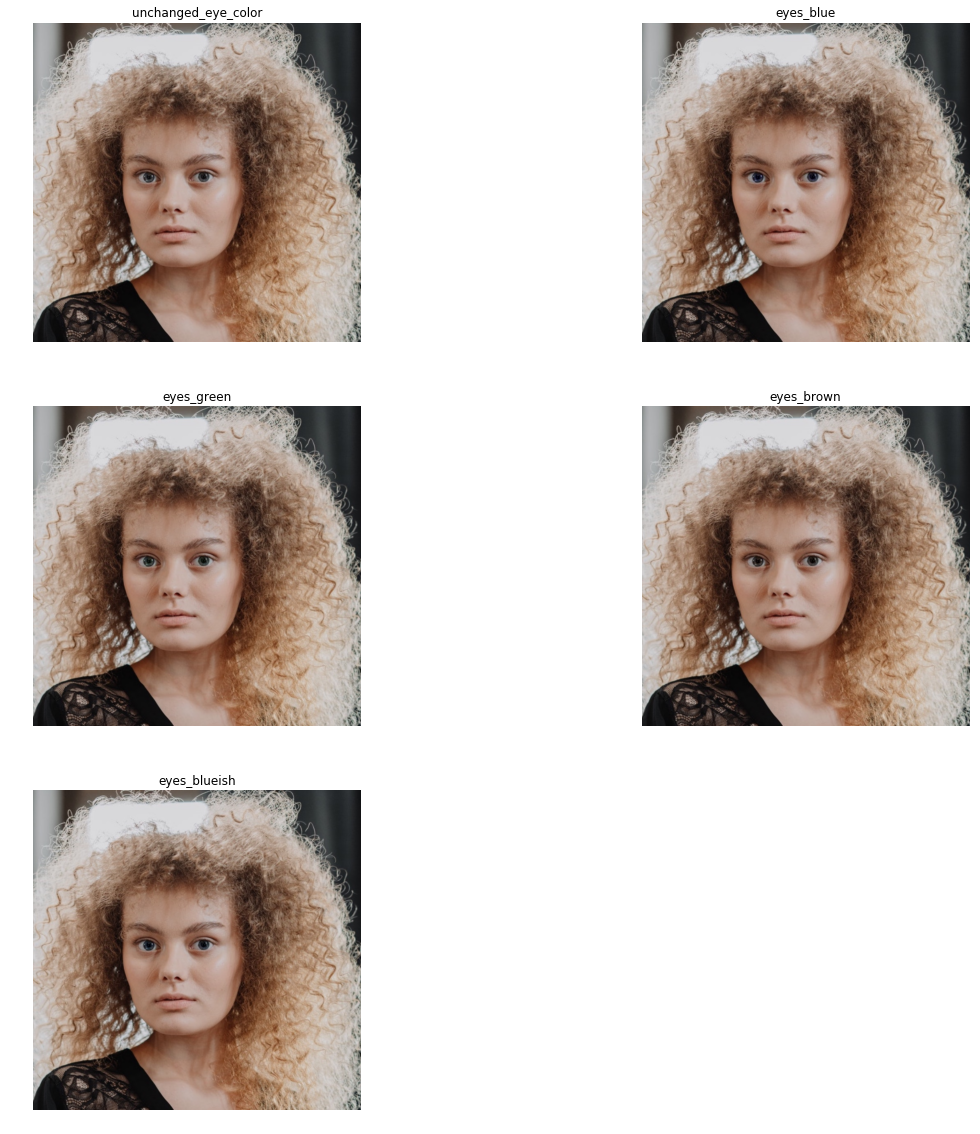

In [102]:
plt.figure(figsize=(20,20))
plt.subplot(321)
plt.title("unchanged_eye_color")
plt.imshow(imDlib)
ax = plt.axis('off')
plt.subplot(322)
plt.title("eyes_blue")
plt.imshow(eyes_blue)
ax = plt.axis('off')
plt.subplot(323)
plt.title("eyes_green")
plt.imshow(eyes_green)
ax = plt.axis('off')
plt.subplot(324)
plt.title("eyes_brown")
plt.imshow(eyes_brown)
ax = plt.axis('off')
plt.subplot(325)
plt.title("eyes_blueish")
plt.imshow(eyes_blueish)
ax = plt.axis('off')